In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nguyen17/uci-wholesale-customers-data")

print("Path to dataset files:", path)

100%|██████████| 6.85k/6.85k [00:00<00:00, 9.75MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nguyen17/uci-wholesale-customers-data/versions/1


In [3]:
df = pd.read_csv(path + "/Wholesale customers data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Pre-processing

## Cek Missing Values

In [ ]:
df.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


## Pemilihan Kolom

In [ ]:
df_num = df.drop(columns=["Channel", "Region"])
df_num.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Standarisasi Data

In [ ]:
# Standarisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

# Konversi kembali ke DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_num.columns)

# Cek hasil standarisasi
df_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Inisiasi PCA

In [ ]:
# Hitung matriks kovarians
cov_matrix = np.cov(df_scaled.T)

# Tampilkan bentuk matriks kovarians
print("Matriks Kovarians:\n", cov_matrix)

Matriks Kovarians:
 [[ 1.0022779   0.10073872 -0.01188088  0.34666934 -0.10218518  0.24524735]
 [ 0.10073872  1.0022779   0.7299942   0.1242762   0.66332323  0.40729398]
 [-0.01188088  0.7299942   1.0022779  -0.04028429  0.92674693  0.20596461]
 [ 0.34666934  0.1242762  -0.04028429  1.0022779  -0.13182451  0.39183801]
 [-0.10218518  0.66332323  0.92674693 -0.13182451  1.0022779   0.06944914]
 [ 0.24524735  0.40729398  0.20596461  0.39183801  0.06944914  1.0022779 ]]


In [ ]:
# Hitung eigenvalues dan eigenvectors dari matriks kovarians
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [2.65099857 1.70646229 0.74175057 0.56501435 0.06311455 0.28632709]
Eigenvectors:
 [[-0.04288396 -0.52793212 -0.81225657 -0.23668559  0.03602539  0.04868278]
 [-0.54511832 -0.08316765  0.06038798 -0.08718991  0.03804019 -0.82657929]
 [-0.57925635  0.14608818 -0.10838401  0.10598745 -0.72174458  0.31499943]
 [-0.05118859 -0.61127764  0.17838615  0.76868266  0.01563715  0.02793224]
 [-0.5486402   0.25523316 -0.13619225  0.17174406  0.68589373  0.33964012]
 [-0.24868198 -0.50420705  0.52390412 -0.55206472  0.07513412  0.31470051]]


In [ ]:
# Urutkan eigenvalues dari yang terbesar ke terkecil
sorted_eigenvalues = sorted(eigenvalues, reverse=True)

# Hitung cumulative explained variance
explained_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Tampilkan eigenvalues yang telah diurutkan
print("Cumulative Explained Variance:\n", explained_variance_ratio)

Cumulative Explained Variance:
 [0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]


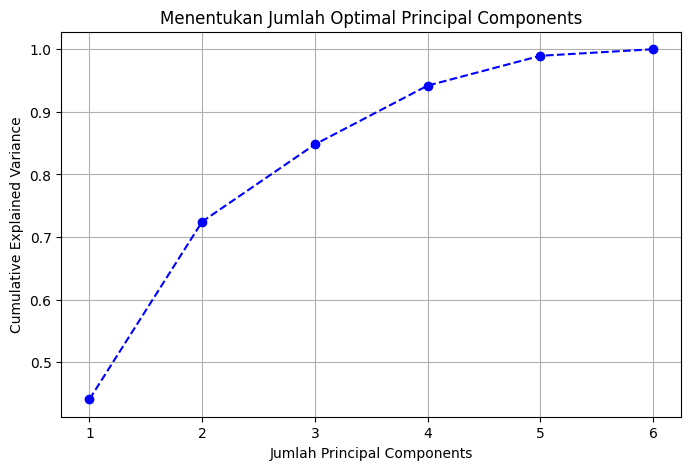

In [ ]:
# Plot explained variance untuk menentukan jumlah optimal PC
plt.figure(figsize=(8,5))
plt.plot(range(1, len(df_scaled.columns)+1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Menentukan Jumlah Optimal Principal Components')
plt.grid()
plt.show()

In [ ]:
# Cek berapa persen informasi yang tercakup dalam PC
for i, j in enumerate(explained_variance_ratio):
    print(f"Persentase informasi fitur yang dimuat dalam PC {i+1}: {j:.2%}")

Persentase informasi fitur yang dimuat dalam PC 1: 44.08%
Persentase informasi fitur yang dimuat dalam PC 2: 72.46%
Persentase informasi fitur yang dimuat dalam PC 3: 84.79%
Persentase informasi fitur yang dimuat dalam PC 4: 94.19%
Persentase informasi fitur yang dimuat dalam PC 5: 98.95%
Persentase informasi fitur yang dimuat dalam PC 6: 100.00%


## Pakai

In [ ]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca[['Channel', 'Region']] = df[['Channel', 'Region']]

df_pca.head()

,PC1,PC2,PC3,Channel,Region
0,0.193291,-0.305100,0.140878,2,3
1,0.434420,-0.328413,-0.319007,2,3
2,0.811143,0.815096,-1.523416,2,3
3,-0.778648,0.652754,-0.163012,1,3
4,0.166287,1.271434,-0.066279,2,3


In [ ]:
# Cek kontribusi setiap fitur terhadap PC1, PC2, dan PC3
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=df_num.columns)

# Urutkan loadings untuk melihat fitur dominan dalam tiap PC
for pc in ['PC1', 'PC2', 'PC3']:
    print(f"\nUrutan fitur dengan kontribusi tertinggi di {pc}:")
    print(loadings[pc].sort_values(ascending=False))



Urutan fitur dengan kontribusi tertinggi di PC1:
Grocery             0.579256
Detergents_Paper    0.548640
Milk                0.545118
Delicassen          0.248682
Frozen              0.051189
Fresh               0.042884
Name: PC1, dtype: float64

Urutan fitur dengan kontribusi tertinggi di PC2:
Frozen              0.611278
Fresh               0.527932
Delicassen          0.504207
Milk                0.083168
Grocery            -0.146088
Detergents_Paper   -0.255233
Name: PC2, dtype: float64

Urutan fitur dengan kontribusi tertinggi di PC3:
Fresh               0.812257
Detergents_Paper    0.136192
Grocery             0.108384
Milk               -0.060388
Frozen             -0.178386
Delicassen         -0.523904
Name: PC3, dtype: float64


# Save

In [ ]:
df_pca.to_csv("/content/pca-uci-wholesale.csv", index=False)